<a href="https://colab.research.google.com/github/sudeepmathew/Voc-Analysis/blob/master/Sentiment_Analysis_for_topic_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Importing Packages

In [0]:
import pandas as pd
import nltk
from nltk import FreqDist
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
nltk.download('wordnet') 
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

# Libraries for text preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
#import nessassary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
from nltk import FreqDist
import spacy

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
stemming: invers
lemmatization: inversely
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
data_5 = pd.read_csv("/content/drive/My Drive/file5.csv")

In [0]:
data_5.shape

(348, 3)

In [0]:
data_5.head()

,Unnamed: 0,Reviews,Topic
0,1,happening name car day first harrier hector ha...,4
1,14,vid happening name car day first harrier hecto...,4
2,17,thats good move people subscribe month like buy,4
3,38,mg manages despatch hector july compass unit c...,4
4,43,thank giving detailed response osh honda city ...,4


In [0]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "get","like","think","new","much",
             "https", "previously", "shown","quote","originally","posted","post","owner","youtube","www","http","would"]
stop_words = stop_words.union(new_words)

# Creating a Corpus

In [0]:
corpus = []
for i in range(0, 348):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', data_5['Reviews'][i])
    
    #Convert to lowercase
    #text = text.lower()
    
    #remove tags
    #text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    #text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    #ps=PorterStemmer()
    #Lemmatisation
    #lem = WordNetLemmatizer()
    text = [word for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

# Creating a Bag of Word

In [0]:
bagofwords = []
for i in range (0,348):
  words =corpus[i].split()
  bagofwords.append(words)

In [0]:
#printing bag of word of 100th item in the list
print(bagofwords[100])

['nirmaljusdoit', 'going', 'initial', 'report', 'tata', 'harrier', 'tough', 'time', 'coming', 'month', 'hector', 'better', 'built', 'customer', 'service', 'superior', 'well', 'yet', 'single', 'getting', 'serviced', 'india', 'already', 'started', 'counting', 'positive', 'harrier', 'go', 'damage', 'tata', 'done', 'brand', 'name', 'providing', 'shoddy', 'sale', 'service', 'last', 'decade']


# Sentiment Analysis For Topic 5

In [0]:
from textblob import TextBlob
sentiment_text=[TextBlob(review) for review in corpus]
print(sentiment_text[0].polarity)
print(sentiment_text[0])

0.0625
happening name car day first harrier hector harrier place hector even mg historically letter name mg india could kept combination go back historically people refer mg mg b ta tc even mg


In [0]:
sentiments = [[review.sentiment.polarity,str(review)] for review in sentiment_text]
sentiment_df = pd.DataFrame(sentiments, columns=['polarity','review'])
sentiment_df.sort_values(by='polarity',ascending=False)

,polarity,review
153,0.800000,brochure list proud history reinforces custome...
12,0.700000,keeping prospective buyer waiting month brand ...
2,0.700000,thats good move people subscribe month buy
118,0.700000,superb pricing mg hector come mg shield year u...
39,0.700000,good petrol engine expect hike k k maruti hyun...
...,...,...
323,-0.250000,coolkurt congratulation handling charge disgui...
74,-0.250000,coolkurt congratulation handling charge disgui...
102,-0.333333,swiftlife concern people end buying vehicle ch...
17,-0.400000,mg hector understanding parking vehicle road u...


# Sentiment Distribution for Topic 5

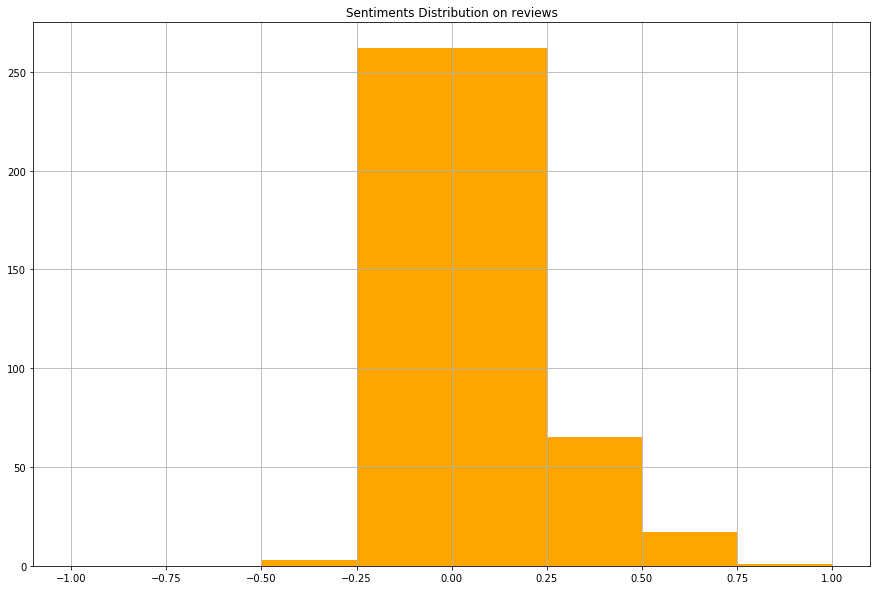

In [0]:
fig,ax = plt.subplots(figsize=(15,10))
sentiment_df.hist(bins=[-1,-0.75,-0.5,-0.25,0.25,0.5,0.75,1], ax=ax, color='orange')
plt.title('Sentiments Distribution on reviews')
plt.show()

In [0]:
sentiment_df.to_csv('sent_file5.csv') 